In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pyblock

# Manual style for plots
import sys
sys.path.append('../')
import style
from blockAverage import blockAverage

In [4]:
strands=["AA","AB","AC","AD", "AE", "AF", "AG", "AH", "AI", "AJ", "AK", "AL", "AM", "AN", "OA", "OB", "OC", "OD", "OE", "OF", "OG", "OH", "OI", "OJ", "OK", "OL", "OM", "ON", "OO", "OP", "OQ", "OR", "OS", "OT", "OU", "OV", "OW", "OX", "OY", "OZ"]
peptide_colors = ["#FFE4E1","#CD5C5C","#CD2626","#BFEFFF","#00BFFF","#104E8B"]
sys=["pkG_peG","pkA_peA","pkL_peL","pkkg_peeg","pkka_peea","pkkl_peel"]

data=[]

for i in sys:
    tmp = pd.read_csv("data/"+i+"_rgyr_ALL.out",delim_whitespace=True,header=None)
    tmp = tmp.set_axis(strands, axis=1)
    data.append(tmp)#.iloc[:,1:4:2])
    
data[0] #pkG

,AA,AB,AC,AD,AE,AF,AG,AH,AI,AJ,...,OQ,OR,OS,OT,OU,OV,OW,OX,OY,OZ
0,12.042041,12.042175,12.041593,12.041216,12.042031,12.039232,12.043170,12.042216,12.037945,12.042181,...,12.305616,12.304440,12.307859,12.303179,12.038329,12.037864,12.042461,12.039398,12.042232,12.040365
1,12.249929,12.262332,12.106012,12.187763,12.113982,12.120876,12.238993,12.180445,12.117277,11.979851,...,12.440959,12.329596,12.526209,12.493385,12.275500,12.342759,12.170381,12.091607,12.062158,12.206937
2,12.915685,13.017915,17.866747,14.862430,14.212024,14.689633,13.735765,12.754945,13.897449,12.201943,...,15.258084,15.147915,11.891981,13.319863,16.062511,13.785471,14.631726,16.627340,15.367230,15.007614
3,14.215880,13.113381,18.884718,16.762865,14.069529,16.789244,13.981250,13.623526,15.830688,13.326561,...,17.213074,17.221231,13.005997,13.054367,17.062239,13.800492,15.530098,16.850349,13.703214,14.273172
4,15.860102,12.610164,17.826120,17.847216,13.878116,17.357761,14.742611,14.180753,15.604624,14.006751,...,18.097359,16.932119,12.340501,14.495081,17.471392,13.628791,16.411892,16.515192,14.407722,15.424589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3747,15.188862,12.454808,15.090042,15.211888,14.821649,13.684949,14.601877,11.658594,14.055244,15.196223,...,17.324463,15.266319,11.067371,13.258029,13.878754,19.605110,20.099890,12.770894,16.749832,16.029791
3748,15.586466,12.811299,14.872557,15.379195,14.503608,13.485354,14.885017,11.752445,13.725353,15.317506,...,16.944696,15.523970,11.097401,13.311077,14.266814,19.610113,20.934671,12.114078,16.543047,15.455084
3749,15.584284,12.761064,15.071020,15.411620,14.619848,13.571045,14.755909,11.723833,13.905029,15.085546,...,16.708773,15.645924,10.958198,13.029403,14.073495,18.775986,20.578518,12.864697,16.827766,15.872214
3750,15.538713,12.852076,14.829295,15.153044,14.610101,13.650965,14.463710,11.695631,13.854616,15.404097,...,17.256697,15.413941,10.972333,13.147344,13.941664,19.186987,19.768618,13.009618,16.801420,16.545200


In [5]:
# addting information on charge based on their name (OA,OB,...) aka the col position.
charge=["-","-","-","-", "-", "-", "-", "-", "-", "-", "-", "-", "-", "-", "+", "+", "+", "+", "+", "+", "+", "+", "+", "+", "+", "+", "+", "+", "+", "+", "+", "+", "+", "+", "-", "-", "-", "-", "-", "-"]
maskA=[] # LYS
maskB=[]
for i in range(40):
    if charge[i]=="+":
        maskA.append(i)
    else:
        maskB.append(i)

#data[0].iloc[maskA] # GLY LYS
dataA=[]
dataB=[]

for i in range(6):
    dataA.append(data[i].iloc[:,maskA]) #Positive peptides 
    dataB.append(data[i].iloc[:,maskB]) #Negative peptides

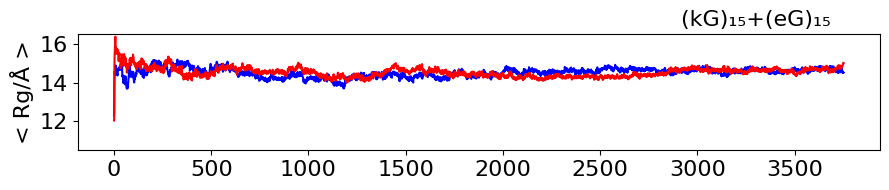

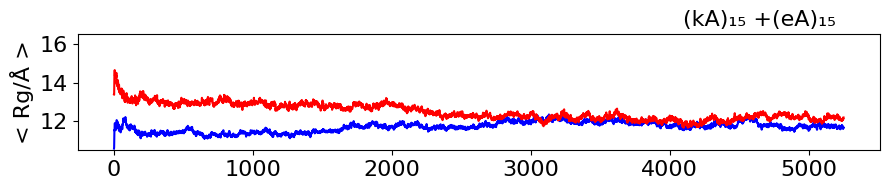

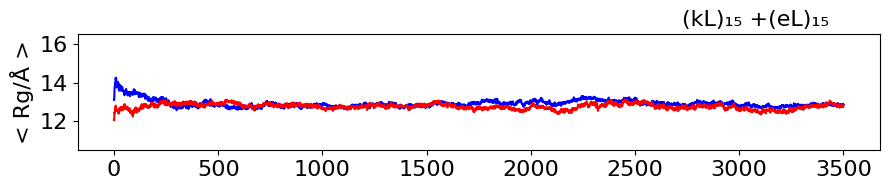

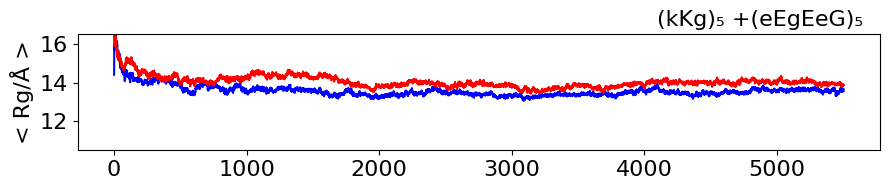

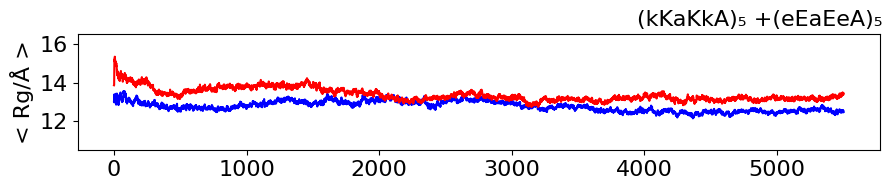

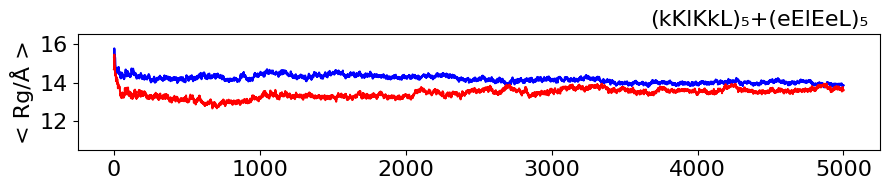

In [6]:
for i in range(0,6):
    plt.figure(figsize=(9,2))
    plt.plot(dataA[i].mean(axis=1), color='blue')
    plt.plot(dataB[i].mean(axis=1), color='red')
    
    plt.ylim(10.5,16.5)
    plt.title(style.sys_labels[i],y=1.0,x=0.85,fontsize=style.font_size)
    plt.ylabel('< Rg/Å >',fontsize=style.font_size)
    plt.yticks(fontsize=style.font_size)
    plt.xticks(fontsize=style.font_size)
    plt.tight_layout()
    
    #plt.savefig("RG_single_series"+str(i)+".png",dpi=600)

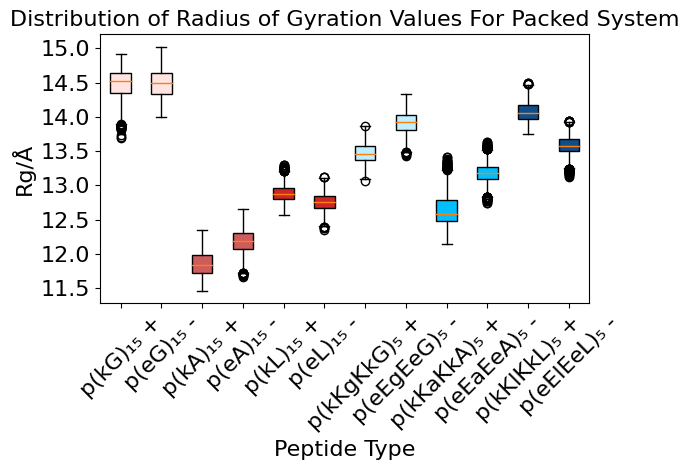

In [7]:
colors=['#FFE4E1','#FFE4E1','#CD5C5C','#CD5C5C','#CD2626','#CD2626','#BFEFFF','#BFEFFF','#00BFFF','#00BFFF','#104E8B','#104E8B']
pep_labels = ["p(kG)₁₅ +","p(eG)₁₅ -",'p(kA)₁₅ +','p(eA)₁₅ -','p(kL)₁₅ +','p(eL)₁₅ -','p(kKgKkG)₅ +','p(eEgEeG)₅ -','p(kKaKkA)₅ +','p(eEaEeA)₅ -','p(kKlKkL)₅ +','p(eElEeL)₅ -']
tmp=[]
for i in range(6):
    tmp.append(dataA[i].mean(axis=1).tail(3000))
    tmp.append(dataB[i].mean(axis=1).tail(3000))
    
bplot = plt.boxplot(x=tmp,patch_artist=True)
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)
    
# LABELS
plt.title('Distribution of Radius of Gyration Values For Packed System',fontsize=style.font_size)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],pep_labels,rotation=45,fontsize=style.font_size)

plt.yticks(fontsize=style.font_size)
plt.xlabel('Peptide Type',fontsize=style.font_size)
plt.ylabel('Rg/Å',fontsize=style.font_size)
plt.tight_layout()
#plt.savefig("RG_packed_last3000fr.png",dpi=600)

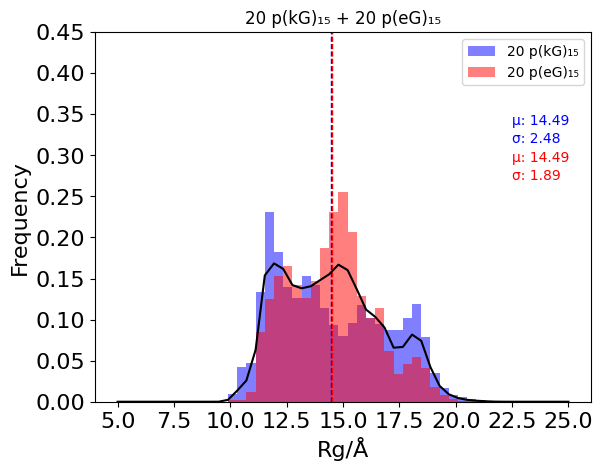

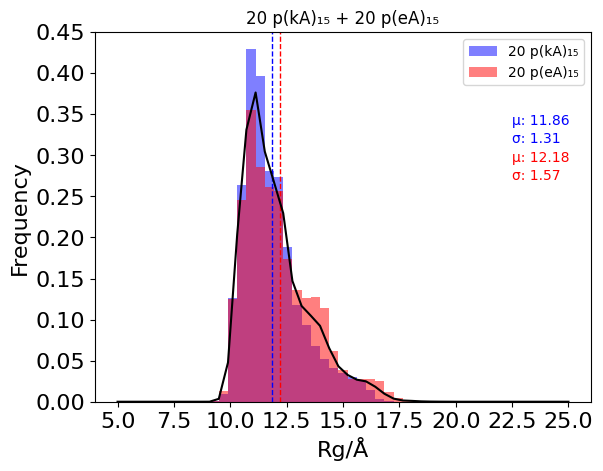

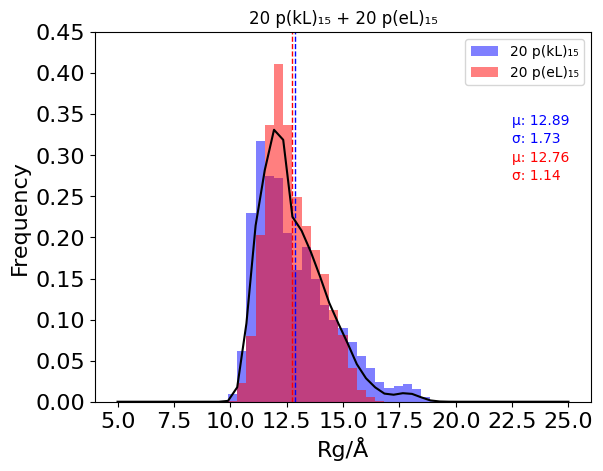

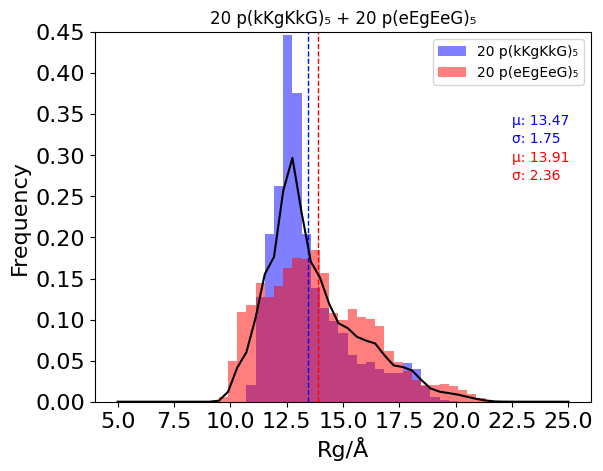

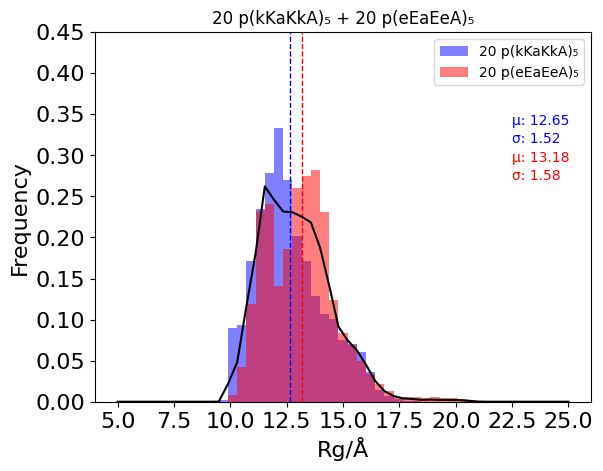

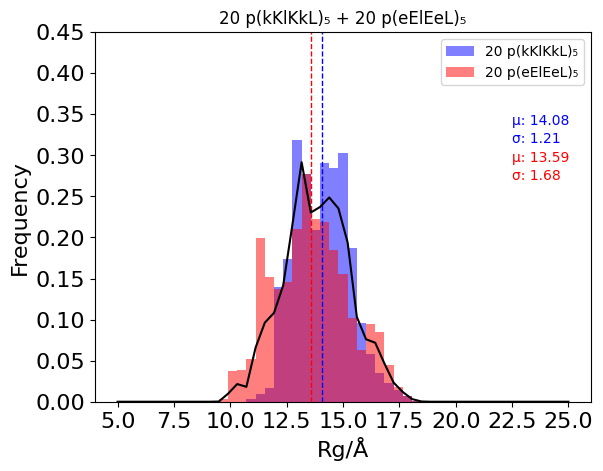

<Figure size 640x480 with 0 Axes>

In [10]:
import scipy.stats as stats
pep_labels = ["20 p(kG)₁₅","20 p(eG)₁₅",'20 p(kA)₁₅','20 p(eA)₁₅','20 p(kL)₁₅','20 p(eL)₁₅','20 p(kKgKkG)₅','20 p(eEgEeG)₅','20 p(kKaKkA)₅','20 p(eEaEeA)₅','20 p(kKlKkL)₅' ,'20 p(eElEeL)₅']

for i in range(6):
    plt.clf()
    ar = np.array(data[i].tail(3000).values) # All data
    ar = ar.flatten()
    density = stats.gaussian_kde(ar)
    
    arA = np.array(dataA[i].tail(3000).values) # POS
    arA = arA.flatten()
    
    arB = np.array(dataB[i].tail(3000).values) # NEG
    arB = arB.flatten()
    
    plt.hist(arA, bins=np.linspace(5, 25, 50), histtype='stepfilled', density=True,color="blue",alpha=0.5,label=pep_labels[2*i]) 
    n, x, _ = plt.hist(arB, bins=np.linspace(5, 25, 50), histtype='stepfilled', density=True,color="red",alpha=0.5,label=pep_labels[(2*i)+1])
    plt.legend()
    min_ylim, max_ylim = plt.ylim(0,0.45)
    
    plt.axvline(arA.mean(), color='blue', linestyle='dashed', linewidth=1)
    plt.text(x.mean()*1.5, max_ylim*0.75, 'μ: {:.2f}'.format(arA.mean()), color="blue")
    plt.text(x.mean()*1.5, max_ylim*0.70, 'σ: {:.2f}'.format(arA.std()), color="blue")
    
    plt.axvline(arB.mean(), color='red', linestyle='dashed', linewidth=1)
    plt.text(x.mean()*1.5, max_ylim*0.65, 'μ: {:.2f}'.format(arB.mean()), color="red")
    plt.text(x.mean()*1.5, max_ylim*0.60, 'σ: {:.2f}'.format(arB.std()), color="red")
    
    plt.plot(x, density(x), color = "black")
    plt.title(pep_labels[2*i]+" + "+pep_labels[(2*i)+1])
    plt.xlabel('Rg/Å',fontsize=style.font_size)
    plt.ylabel('Frequency',fontsize=style.font_size)
    plt.yticks(fontsize=style.font_size)
    plt.xticks(fontsize=style.font_size)
    plt.show()
    plt.tight_layout()
    #plt.savefig(str(i)+"_RG_P_3000fr_hist.png",dpi=600)
  